In [ ]:
# Cell 1 - Dataset Acquisition with Enhanced Metadata
import kagglehub
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Download RAVDESS dataset
path = kagglehub.dataset_download("uwrfkaggler/ravdess-emotional-speech-audio")
print(f"Dataset downloaded to: {path}")

# RAVDESS emotion mapping
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

emotion_intensity = {
    '01': 1,  # Neutral
    '02': 2,  # Calm
    '03': 2,  # Happy
    '04': 2,  # Sad
    '05': 2,  # Angry
    '06': 2,  # Fearful
    '07': 2,  # Disgust
    '08': 2   # Surprised
}

# Find all .wav files
search_patterns = [
    os.path.join(path, "Actor_*", "*.wav"),
    os.path.join(path, "audio_speech_actors_01-24", "Actor_*", "*.wav"),
    os.path.join(path, "**", "*.wav")
]

wav_files = []
for pattern in search_patterns:
    matches = glob.glob(pattern, recursive=True)
    wav_files.extend(matches)

wav_files = sorted(list(set(wav_files)))

# Parse filenames and extract comprehensive metadata
metadata = {
    'filepath': [],
    'filename': [],
    'actor_id': [],
    'emotion_id': [],
    'emotion_label': [],
    'intensity': [],
    'statement': [],
    'repetition': [],
    'gender': []
}

for filepath in wav_files:
    filename = os.path.basename(filepath)
    parts = filename.split('-')

    if len(parts) >= 7:
        emotion_id = parts[2]
        if emotion_id in emotion_map:
            metadata['filepath'].append(filepath)
            metadata['filename'].append(filename)
            metadata['actor_id'].append(parts[6].split('.')[0])
            metadata['emotion_id'].append(emotion_id)
            metadata['emotion_label'].append(emotion_map[emotion_id])
            metadata['intensity'].append(emotion_intensity.get(parts[3], 1))
            metadata['statement'].append(parts[4])
            metadata['repetition'].append(parts[5])
            metadata['gender'].append('female' if int(parts[6].split('.')[0]) % 2 == 0 else 'male')

# Create DataFrame for analysis
df_metadata = pd.DataFrame(metadata)
print(f"Total audio files detected: {len(df_metadata)}")
print(f"\nDataset Statistics:")
print(f"Unique actors: {df_metadata['actor_id'].nunique()}")
print(f"Unique emotions: {df_metadata['emotion_label'].nunique()}")
print(f"Gender distribution:")
print(df_metadata['gender'].value_counts())
print(f"\nEmotion distribution:")
emotion_counts = df_metadata['emotion_label'].value_counts()
print(emotion_counts)

# Plot dataset distribution
plt.figure(figsize=(12, 8))
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Emotion distribution
ax1 = axes[0, 0]
emotion_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Distribution of Emotion Classes', fontsize=14, fontweight='bold')
ax1.set_xlabel('Emotion', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Gender distribution
ax2 = axes[0, 1]
gender_counts = df_metadata['gender'].value_counts()
gender_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
ax2.set_title('Gender Distribution', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

# Actor-wise distribution
ax3 = axes[1, 0]
actor_counts = df_metadata['actor_id'].value_counts().sort_index()
actor_counts.plot(kind='bar', ax=ax3, color='lightgreen', width=0.8)
ax3.set_title('Samples per Actor', fontsize=14, fontweight='bold')
ax3.set_xlabel('Actor ID', fontsize=12)
ax3.set_ylabel('Number of Samples', fontsize=12)
ax3.tick_params(axis='x', rotation=0)

# Intensity distribution
ax4 = axes[1, 1]
intensity_counts = df_metadata['intensity'].value_counts().sort_index()
intensity_counts.plot(kind='bar', ax=ax4, color='gold')
ax4.set_title('Intensity Level Distribution', fontsize=14, fontweight='bold')
ax4.set_xlabel('Intensity Level', fontsize=12)
ax4.set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.savefig('dataset_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Prepare data for model
filepaths = df_metadata['filepath'].tolist()
labels = df_metadata['emotion_label'].tolist()
actor_ids = df_metadata['actor_id'].tolist()
genders = df_metadata['gender'].tolist()

print("\n" + "="*60)
print("DATASET SUMMARY FOR PUBLICATION")
print("="*60)
print(f"Total Samples: {len(filepaths)}")
print(f"Number of Actors: {len(set(actor_ids))}")
print(f"Number of Emotion Classes: {len(set(labels))}")
print(f"Classes: {sorted(set(labels))}")
print(f"Average samples per class: {len(filepaths)/len(set(labels)):.1f}")
print("="*60)

: 

2026-01-09 10:36:05.462169: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-09 10:36:05.511299: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-09 10:36:05.858150: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-09 10:36:05.860173: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-09 10:36:07.314892: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Extracting combined features (Specific + Traditional)...
Processed 0/2880 files...
Processed 50/2880 files...
Processed 100/2880 files...
Processed 150/2880 files...
Processed 200/2880 files...
Processed 250/2880 files...
Processed 300/2880 files...
Processed 350/2880 files...
Processed 400/2880 files...
Processed 450/2880 files...
Processed 500/2880 files...
Processed 550/2880 files...
Processed 600/2880 files...
Processed 650/2880 files...
Processed 700/2880 files...
Processed 750/2880 files...
Processed 800/2880 files...
Processed 850/2880 files...
Processed 900/2880 files...
Processed 950/2880 files...
Processed 1000/2880 files...
Processed 1050/2880 files...
Processed 1100/2880 files...
Processed 1150/2880 files...
Processed 1200/2880 files...
Processed 1250/2880 files...
Processed 1300/2880 files...
Processed 1350/2880 files...
Processed 1400/2880 files...
Processed 1450/2880 files...
Processed 1500/2880 files...
Processed 1550/2880 files...
Processed 1600/2880 files...
Processed

2026-01-09 10:48:14.406449: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Autoencoder architecture summary:
Total parameters: 1,056,219

Training autoencoder with early stopping...
Epoch 1/50
108/108 [==============================] - 12s 65ms/step - loss: 0.6800 - mae: 0.5572 - val_loss: 0.6058 - val_mae: 0.5284 - lr: 5.0000e-04
Epoch 2/50
108/108 [==============================] - 6s 57ms/step - loss: 0.5352 - mae: 0.4878 - val_loss: 0.5169 - val_mae: 0.4764 - lr: 5.0000e-04
Epoch 3/50
108/108 [==============================] - 6s 57ms/step - loss: 0.4976 - mae: 0.4681 - val_loss: 0.4899 - val_mae: 0.4666 - lr: 5.0000e-04
Epoch 4/50
108/108 [==============================] - 6s 58ms/step - loss: 0.4719 - mae: 0.4538 - val_loss: 0.4701 - val_mae: 0.4560 - lr: 5.0000e-04
Epoch 5/50
108/108 [==============================] - 6s 58ms/step - loss: 0.4555 - mae: 0.4455 - val_loss: 0.4428 - val_mae: 0.4368 - lr: 5.0000e-04
Epoch 6/50
108/108 [==============================] - 6s 57ms/step - loss: 0.4412 - mae: 0.4380 - val_loss: 0.4369 - val_mae: 0.4355 - lr: 5.0

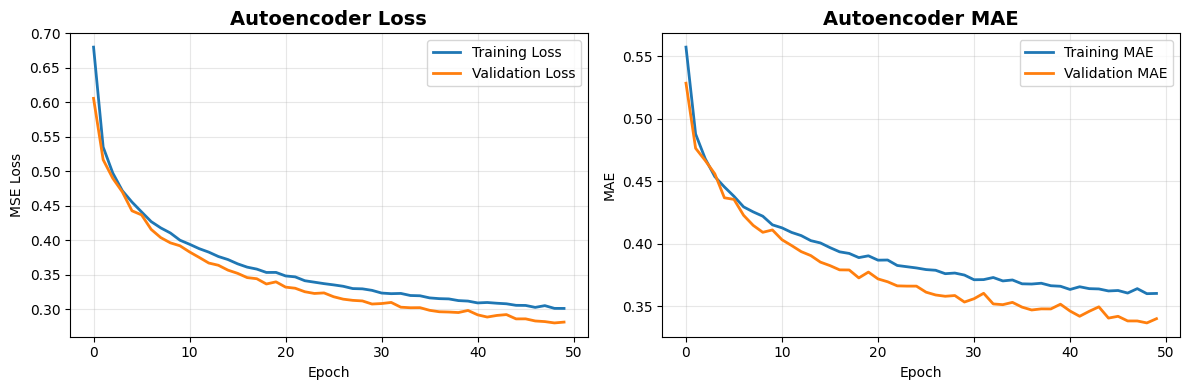

Autoencoder final loss: 0.3013
Autoencoder final val loss: 0.2815

STEP 2: 5-Fold Cross Validation for Classifier

Fold 1/5
Classifier parameters: 2,766,713

Phase 1: Training classifier (encoder frozen)...
Epoch 1/40
96/96 [==============================] - 15s 74ms/step - loss: 2.9236 - accuracy: 0.1719 - val_loss: 2.3243 - val_accuracy: 0.1302 - lr: 5.0000e-04
Epoch 2/40
96/96 [==============================] - 6s 59ms/step - loss: 2.3752 - accuracy: 0.2678 - val_loss: 2.0532 - val_accuracy: 0.3368 - lr: 5.0000e-04
Epoch 3/40
96/96 [==============================] - 6s 59ms/step - loss: 2.0963 - accuracy: 0.3507 - val_loss: 1.7219 - val_accuracy: 0.4983 - lr: 5.0000e-04
Epoch 4/40
96/96 [==============================] - 6s 60ms/step - loss: 1.9077 - accuracy: 0.4110 - val_loss: 1.6077 - val_accuracy: 0.5069 - lr: 5.0000e-04
Epoch 5/40
96/96 [==============================] - 6s 60ms/step - loss: 1.7404 - accuracy: 0.4583 - val_loss: 1.3701 - val_accuracy: 0.5972 - lr: 5.0000e-04
Ep

In [2]:
# Cell 2 - Complete SER Pipeline with Specific + Traditional Features (Fixed & Optimized)
import librosa
import librosa.feature
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, signal
from scipy.signal import hilbert
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
import warnings
warnings.filterwarnings('ignore')
import gc

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Configuration - Optimized parameters
SR = 22050
DURATION = 3.0
OFFSET = 0.5
MAX_TIMESTEPS = 130

# OPTIMIZED HYPERPARAMETERS
AUTOENCODER_EPOCHS = 50
CLASSIFIER_EPOCHS = 40
FINE_TUNE_EPOCHS = 20
BATCH_SIZE = 24
LEARNING_RATE = 0.0005

# Combined feature extraction functions (Specific + Traditional)
def extract_frame_features(audio, sr=SR):
    """Extract frame-level features including both specific and traditional features"""
    features_list = []
    
    # ==================== TRADITIONAL FEATURES ====================
    # 1. MFCCs (40 features)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40, n_fft=2048, hop_length=512)
    features_list.append(mfcc)
    
    # 2. Delta MFCCs (20 features)
    delta_mfcc = librosa.feature.delta(mfcc, width=3, order=1)[:20]
    features_list.append(delta_mfcc)
    
    # 3. Delta2 MFCCs (20 features)
    delta2_mfcc = librosa.feature.delta(mfcc, width=3, order=2)[:20]
    features_list.append(delta2_mfcc)
    
    # 4. Log-Mel Spectrogram (40 features)
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=40,
                                              n_fft=2048, hop_length=512)
    log_mel = librosa.power_to_db(mel_spec)
    features_list.append(log_mel)
    
    # ==================== SPECIFIC FEATURES ====================
    # 5. Spectral Contrast (7 features)
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr, n_bands=6)
    features_list.append(spectral_contrast)
    
    # 6. Zero Crossing Rate (1 feature)
    zcr = librosa.feature.zero_crossing_rate(audio, frame_length=2048, hop_length=512)
    features_list.append(zcr)
    
    # 7. Spectral Flux (1 feature)
    spectral_flux = librosa.onset.onset_strength(y=audio, sr=sr)
    spectral_flux = spectral_flux.reshape(1, -1)
    features_list.append(spectral_flux)
    
    # Stack all frame features
    frame_features = np.vstack(features_list)
    return frame_features.T

def extract_utterance_features(audio, sr=SR):
    """Extract utterance-level features including both specific and traditional features"""
    features = []
    
    # ==================== SPECIFIC FEATURES ====================
    # 1. Spectral Entropy
    spectral_power = np.abs(librosa.stft(audio, n_fft=2048, hop_length=512))**2
    spectral_sum = np.sum(spectral_power, axis=1)
    spectral_probs = spectral_sum / (np.sum(spectral_sum) + 1e-10)
    spectral_entropy = -np.sum(spectral_probs * np.log(spectral_probs + 1e-10))
    features.append(spectral_entropy)
    
    # 2. Renyi Entropy (alpha=2)
    spectral_probs_renyi = spectral_probs**2
    renyi_entropy = -np.log(np.sum(spectral_probs_renyi) + 1e-10)
    features.append(renyi_entropy)
    
    # 3. Teager Energy Operator (TEO)
    teo = audio[1:-1]**2 - audio[:-2] * audio[2:]
    teo_mean = np.mean(teo)
    teo_std = np.std(teo)
    teo_entropy = stats.entropy(np.histogram(teo, bins=20)[0] + 1e-10)
    features.extend([teo_mean, teo_std, teo_entropy])
    
    # 4. HPSS (Harmonic-Percussive Source Separation) features
    harmonic, percussive = librosa.effects.hpss(audio)
    
    # Harmonic-to-percussive ratio
    harmonic_energy = np.sum(harmonic**2)
    percussive_energy = np.sum(percussive**2)
    hpr = harmonic_energy / (percussive_energy + 1e-10)
    features.append(hpr)
    
    # Harmonic and percussive RMS
    harmonic_rms = np.sqrt(np.mean(harmonic**2))
    percussive_rms = np.sqrt(np.mean(percussive**2))
    features.extend([harmonic_rms, percussive_rms])
    
    # 5. Enhanced ZCR features
    zcr_frame = librosa.feature.zero_crossing_rate(audio, frame_length=2048, hop_length=512)[0]
    zcr_mean = np.mean(zcr_frame)
    zcr_std = np.std(zcr_frame)
    zcr_entropy = stats.entropy(np.histogram(zcr_frame, bins=20)[0] + 1e-10)
    features.extend([zcr_mean, zcr_std, zcr_entropy])
    
    # 6. Spectral Contrast statistics
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr, n_bands=6)
    spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
    spectral_contrast_std = np.std(spectral_contrast, axis=1)
    features.extend(spectral_contrast_mean.tolist())
    features.extend(spectral_contrast_std.tolist())
    
    # 7. Spectral Flux statistics
    spectral_flux = librosa.onset.onset_strength(y=audio, sr=sr)
    spectral_flux_mean = np.mean(spectral_flux)
    spectral_flux_std = np.std(spectral_flux)
    spectral_flux_entropy = stats.entropy(np.histogram(spectral_flux, bins=20)[0] + 1e-10)
    features.extend([spectral_flux_mean, spectral_flux_std, spectral_flux_entropy])
    
    # 8. VMD-like features (simplified)
    def get_imf_features(signal):
        """Extract IMF-like features"""
        analytic_signal = hilbert(signal)
        amplitude_envelope = np.abs(analytic_signal)
        instantaneous_phase = np.unwrap(np.angle(analytic_signal))
        instantaneous_frequency = np.diff(instantaneous_phase) / (2.0 * np.pi) * sr
        
        env_mean = np.mean(amplitude_envelope)
        env_std = np.std(amplitude_envelope)
        freq_mean = np.mean(instantaneous_frequency) if len(instantaneous_frequency) > 0 else 0
        freq_std = np.std(instantaneous_frequency) if len(instantaneous_frequency) > 0 else 0
        
        return [env_mean, env_std, freq_mean, freq_std]
    
    imf_features = get_imf_features(audio)
    features.extend(imf_features)
    
    # ==================== ADDITIONAL ENERGY FEATURES ====================
    # 9. RMS Energy and Entropy
    rms = librosa.feature.rms(y=audio)[0]
    rms_mean = np.mean(rms)
    rms_std = np.std(rms)
    rms_entropy = stats.entropy(np.histogram(rms, bins=20)[0] + 1e-10)
    features.extend([rms_mean, rms_std, rms_entropy])
    
    # 10. Total Energy
    total_energy = np.sum(audio**2)
    features.append(total_energy)
    
    # 11. Energy Entropy
    frames = librosa.util.frame(audio, frame_length=2048, hop_length=512)
    frame_energies = np.sum(frames**2, axis=0)
    frame_energies_normalized = frame_energies / (np.sum(frame_energies) + 1e-10)
    energy_entropy = -np.sum(frame_energies_normalized * np.log(frame_energies_normalized + 1e-10))
    features.append(energy_entropy)
    
    # 12. Spectral Energy Entropy
    spectral_energy = np.abs(librosa.stft(audio, n_fft=2048, hop_length=512))
    spectral_energy_sum = np.sum(spectral_energy, axis=1)
    spectral_energy_normalized = spectral_energy_sum / (np.sum(spectral_energy_sum) + 1e-10)
    spectral_energy_entropy = -np.sum(spectral_energy_normalized * np.log(spectral_energy_normalized + 1e-10))
    features.append(spectral_energy_entropy)
    
    # 13. Spectral Energy in Four Subbands
    n_fft = 2048
    freq_bins = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    stft = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=512))
    
    subband_limits = [0, 500, 1000, 2000, sr/2]
    for i in range(len(subband_limits)-1):
        mask = (freq_bins >= subband_limits[i]) & (freq_bins < subband_limits[i+1])
        subband_energy = np.sum(stft[mask, :])
        features.append(subband_energy)
    
    # 14. Permutation Entropy
    def permutation_entropy(signal_data, m=3, delay=1):
        n = len(signal_data)
        permutations = []
        for i in range(n - (m-1)*delay):
            segment = signal_data[i:i + m*delay:delay]
            permutations.append(tuple(np.argsort(segment)))
        unique_perms, counts = np.unique(permutations, return_counts=True)
        probs = counts / np.sum(counts)
        return -np.sum(probs * np.log(probs + 1e-10))
    
    perm_entropy = permutation_entropy(audio[:min(len(audio), 1000)], m=3, delay=1)
    features.append(perm_entropy)
    
    # 15. Skewness and Kurtosis
    skewness = stats.skew(audio)
    kurtosis = stats.kurtosis(audio)
    features.extend([skewness, kurtosis])
    
    # 16. Spectral Roll-off statistics
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr, roll_percent=0.85)[0]
    features.extend([np.mean(spectral_rolloff), np.std(spectral_rolloff)])
    
    # 17. Pitch features
    pitches, magnitudes = librosa.piptrack(y=audio, sr=sr)
    pitch_values = pitches[magnitudes > np.max(magnitudes) * 0.1]
    if len(pitch_values) > 0:
        pitch_mean = np.mean(pitch_values)
        pitch_std = np.std(pitch_values)
        pitch_entropy = stats.entropy(np.histogram(pitch_values, bins=20)[0] + 1e-10)
    else:
        pitch_mean = pitch_std = pitch_entropy = 0
    features.extend([pitch_mean, pitch_std, pitch_entropy])
    
    # 18. Chroma features statistics
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)
    chroma_std = np.std(chroma, axis=1)
    features.extend(chroma_mean.tolist())
    features.extend(chroma_std.tolist())
    
    return np.array(features)

def process_audio(filepath):
    """Process single audio file with combined features"""
    audio, sr = librosa.load(filepath, sr=SR, duration=DURATION, offset=OFFSET)
    
    # Frame-level features (traditional + specific)
    frame_feats = extract_frame_features(audio, sr)
    
    # Utterance-level features (specific + additional)
    utterance_feats = extract_utterance_features(audio, sr)
    utterance_feats = utterance_feats.reshape(1, -1)
    
    # Repeat utterance features across time
    utterance_feats_rep = np.repeat(utterance_feats, frame_feats.shape[0], axis=0)
    
    # Combine features
    features = np.hstack([frame_feats, utterance_feats_rep])
    
    # Pad/truncate to fixed timesteps
    if features.shape[0] < MAX_TIMESTEPS:
        pad_width = ((0, MAX_TIMESTEPS - features.shape[0]), (0, 0))
        features = np.pad(features, pad_width, mode='constant')
    else:
        features = features[:MAX_TIMESTEPS, :]
    
    return features

# Process all files
print("Extracting combined features (Specific + Traditional)...")
X = []
for i, fp in enumerate(filepaths):
    if i % 50 == 0:
        print(f"Processed {i}/{len(filepaths)} files...")
    X.append(process_audio(fp))
X = np.array(X)
y = np.array(labels)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_onehot = tf.keras.utils.to_categorical(y_encoded)
class_names = le.classes_

print(f"\nCombined feature extraction complete:")
print(f"Data shape: {X.shape}")
print(f"Labels shape: {y_onehot.shape}")
print(f"Number of features per timestep: {X.shape[2]}")

# Calculate feature breakdown
temp_audio = np.zeros(22050)  # 1 second of silence for testing
frame_features_count = extract_frame_features(temp_audio).shape[1]
utterance_features_count = extract_utterance_features(temp_audio).shape[0]

print(f"\nDetailed Feature Breakdown:")
print("="*50)
print(f"FRAME-LEVEL FEATURES ({frame_features_count} features):")
print("-"*50)
print(f"Traditional Features:")
print(f"  • MFCCs: 40 features")
print(f"  • Delta MFCCs: 20 features")
print(f"  • Delta2 MFCCs: 20 features")
print(f"  • Log-Mel Spectrogram: 40 features")
print(f"\nSpecific Features:")
print(f"  • Spectral Contrast: 7 features (6 bands + mean)")
print(f"  • Zero Crossing Rate: 1 feature")
print(f"  • Spectral Flux: 1 feature")
print(f"  Frame-level Total: {frame_features_count} features")

print(f"\n" + "="*50)
print(f"UTTERANCE-LEVEL FEATURES ({utterance_features_count} features):")
print("-"*50)
print(f"Specific Features:")
print(f"  • Spectral Entropy: 1 feature")
print(f"  • Renyi Entropy: 1 feature")
print(f"  • TEO features: 3 features")
print(f"  • HPSS features: 3 features")
print(f"  • Enhanced ZCR: 3 features")
print(f"  • Spectral Contrast stats: 14 features")
print(f"  • Spectral Flux stats: 3 features")
print(f"  • VMD-like features: 4 features")
print(f"  • RMS Energy & Entropy: 3 features")
print(f"  • Total Energy: 1 feature")
print(f"  • Energy Entropy: 1 feature")
print(f"  • Spectral Energy Entropy: 1 feature")
print(f"  • Spectral Energy in 4 Subbands: 4 features")
print(f"  • Permutation Entropy: 1 feature")
print(f"  • Skewness & Kurtosis: 2 features")
print(f"  • Spectral Roll-off stats: 2 features")
print(f"  • Pitch features: 3 features")
print(f"  • Chroma features stats: 24 features")
print(f"  Utterance-level Total: {utterance_features_count} features")

print(f"\n" + "="*50)
print(f"GRAND TOTAL: {frame_features_count + utterance_features_count} FEATURES")
print(f"  • Frame-level: {frame_features_count} features")
print(f"  • Utterance-level: {utterance_features_count} features")
print(f"  • Combined: {X.shape[2]} features per timestep")

# Scale features globally
print("\nScaling features...")
scaler = StandardScaler()
X_reshaped = X.reshape(-1, X.shape[-1])
X_scaled = scaler.fit_transform(X_reshaped).reshape(X.shape)

# FIXED & SIMPLIFIED Model Definition
def create_autoencoder(input_shape, name_suffix=""):
    """Simplified and Fixed Multi-scale 1D CNN Autoencoder"""
    inputs = keras.Input(shape=input_shape, name=f'input_{name_suffix}')
    orig_timesteps = input_shape[0]
    
    # Initial convolution
    x = layers.Conv1D(64, 7, padding='same', activation='relu',
                     name=f'initial_conv_{name_suffix}')(inputs)
    x = layers.BatchNormalization(name=f'initial_bn_{name_suffix}')(x)
    
    # Multi-scale feature extraction
    conv_outs = []
    for i, kernel in enumerate([3, 5, 7]):
        conv = layers.Conv1D(64, kernel, padding='same', activation='relu',
                           name=f'conv1_{kernel}_{name_suffix}')(x)
        conv = layers.BatchNormalization(name=f'bn1_{kernel}_{name_suffix}')(conv)
        conv = layers.Conv1D(64, kernel, padding='same', activation='relu',
                           name=f'conv2_{kernel}_{name_suffix}')(conv)
        conv = layers.BatchNormalization(name=f'bn2_{kernel}_{name_suffix}')(conv)
        conv = layers.MaxPooling1D(2, name=f'pool_{kernel}_{name_suffix}')(conv)
        conv_outs.append(conv)
    
    # Merge multi-scale features
    if len(conv_outs) > 1:
        merged = layers.Concatenate(name=f'concat_{name_suffix}')(conv_outs)
    else:
        merged = conv_outs[0]
    
    # Encoder
    x = layers.Conv1D(128, 3, padding='same', activation='relu',
                     name=f'enc_conv1_{name_suffix}')(merged)
    x = layers.BatchNormalization(name=f'enc_bn1_{name_suffix}')(x)
    x = layers.MaxPooling1D(2, name=f'enc_pool1_{name_suffix}')(x)
    
    x = layers.Conv1D(256, 3, padding='same', activation='relu',
                     name=f'enc_conv2_{name_suffix}')(x)
    x = layers.BatchNormalization(name=f'enc_bn2_{name_suffix}')(x)
    x = layers.Conv1D(256, 3, padding='same', activation='relu',
                     name=f'enc_conv3_{name_suffix}')(x)
    x = layers.BatchNormalization(name=f'enc_bn3_{name_suffix}')(x)
    
    # Simplified attention mechanism
    def channel_attention(x):
        # Squeeze: Global Average Pooling
        se = layers.GlobalAveragePooling1D()(x)
        # Excitation: Two FC layers with ReLU and Sigmoid
        se = layers.Dense(256 // 16, activation='relu')(se)
        se = layers.Dense(256, activation='sigmoid')(se)
        # Reshape for broadcasting
        se = layers.Reshape((1, 256))(se)
        # Scale the input
        return layers.Multiply()([x, se])
    
    x = channel_attention(x)
    
    bottleneck = layers.MaxPooling1D(2, name=f'bottleneck_{name_suffix}')(x)
    bottleneck = layers.Dropout(0.3, name=f'bottleneck_dropout_{name_suffix}')(bottleneck)
    
    # Decoder
    x = layers.Conv1D(256, 3, padding='same', activation='relu',
                     name=f'dec_conv1_{name_suffix}')(bottleneck)
    x = layers.BatchNormalization(name=f'dec_bn1_{name_suffix}')(x)
    x = layers.UpSampling1D(2, name=f'upsample1_{name_suffix}')(x)
    
    x = layers.Conv1D(128, 3, padding='same', activation='relu',
                     name=f'dec_conv2_{name_suffix}')(x)
    x = layers.BatchNormalization(name=f'dec_bn2_{name_suffix}')(x)
    x = layers.UpSampling1D(2, name=f'upsample2_{name_suffix}')(x)
    
    # Multi-scale reconstruction
    recon_outs = []
    for i, kernel in enumerate([3, 5, 7]):
        rec = layers.Conv1D(64, kernel, padding='same', activation='relu',
                           name=f'deconv_{kernel}_{name_suffix}')(x)
        rec = layers.BatchNormalization(name=f'deconv_bn_{kernel}_{name_suffix}')(rec)
        rec = layers.UpSampling1D(2, name=f'upsample3_{kernel}_{name_suffix}')(rec)
        
        # Adjust to match original timesteps
        if rec.shape[1] < orig_timesteps:
            padding = orig_timesteps - rec.shape[1]
            rec = layers.ZeroPadding1D((0, padding), name=f'pad_{kernel}_{name_suffix}')(rec)
        elif rec.shape[1] > orig_timesteps:
            cropping = rec.shape[1] - orig_timesteps
            rec = layers.Cropping1D((0, cropping), name=f'crop_{kernel}_{name_suffix}')(rec)
        recon_outs.append(rec)
    
    if len(recon_outs) > 1:
        merged_rec = layers.Average(name=f'avg_recon_{name_suffix}')(recon_outs)
    else:
        merged_rec = recon_outs[0]
    
    # Final convolution
    outputs = layers.Conv1D(input_shape[1], 3, padding='same', activation='linear',
                           name=f'output_{name_suffix}')(merged_rec)
    
    return Model(inputs, outputs, name=f'autoencoder_{name_suffix}'), \
           Model(inputs, bottleneck, name=f'encoder_{name_suffix}')

def create_classifier(encoder, num_classes, fold_num):
    """Enhanced Classifier with attention mechanism"""
    encoder_output = encoder.output
    
    # CNN layers with residual connections
    # Block 1
    x1 = layers.Conv1D(256, 5, padding='same', activation='relu',
                      name=f'classifier_conv1_fold{fold_num}')(encoder_output)
    x1 = layers.BatchNormalization(name=f'classifier_bn1_fold{fold_num}')(x1)
    x1 = layers.Conv1D(256, 3, padding='same', activation='relu',
                      name=f'classifier_conv2_fold{fold_num}')(x1)
    x1 = layers.BatchNormalization(name=f'classifier_bn2_fold{fold_num}')(x1)
    x1 = layers.Dropout(0.25, name=f'classifier_dropout1_fold{fold_num}')(x1)
    
    # Residual connection
    shortcut = layers.Conv1D(256, 1, padding='same', 
                           name=f'shortcut1_fold{fold_num}')(encoder_output)
    x1 = layers.Add(name=f'residual1_fold{fold_num}')([x1, shortcut])
    x1 = layers.Activation('relu', name=f'residual1_activation_fold{fold_num}')(x1)
    x1 = layers.MaxPooling1D(2, name=f'classifier_pool1_fold{fold_num}')(x1)
    
    # Block 2
    x2 = layers.Conv1D(192, 5, padding='same', activation='relu',
                      name=f'classifier_conv3_fold{fold_num}')(x1)
    x2 = layers.BatchNormalization(name=f'classifier_bn3_fold{fold_num}')(x2)
    x2 = layers.Conv1D(192, 3, padding='same', activation='relu',
                      name=f'classifier_conv4_fold{fold_num}')(x2)
    x2 = layers.BatchNormalization(name=f'classifier_bn4_fold{fold_num}')(x2)
    x2 = layers.Dropout(0.25, name=f'classifier_dropout2_fold{fold_num}')(x2)
    
    # Residual connection
    shortcut2 = layers.Conv1D(192, 1, padding='same',
                            name=f'shortcut2_fold{fold_num}')(x1)
    x2 = layers.Add(name=f'residual2_fold{fold_num}')([x2, shortcut2])
    x2 = layers.Activation('relu', name=f'residual2_activation_fold{fold_num}')(x2)
    x2 = layers.MaxPooling1D(2, name=f'classifier_pool2_fold{fold_num}')(x2)
    
    # LSTM layers
    lstm1 = layers.Bidirectional(
        layers.LSTM(192, return_sequences=True, dropout=0.2, recurrent_dropout=0.1,
                   name=f'lstm1_fold{fold_num}'),
        name=f'bidirectional1_fold{fold_num}'
    )(x2)
    
    lstm2 = layers.Bidirectional(
        layers.LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.1,
                   name=f'lstm2_fold{fold_num}'),
        name=f'bidirectional2_fold{fold_num}'
    )(lstm1)
    
    # Attention mechanism
    attention = layers.Dense(1, activation='tanh',
                            name=f'attention_dense_fold{fold_num}')(lstm2)
    attention = layers.Flatten(name=f'attention_flatten_fold{fold_num}')(attention)
    attention = layers.Activation('softmax', name=f'attention_softmax_fold{fold_num}')(attention)
    attention = layers.RepeatVector(128*2, name=f'attention_repeat_fold{fold_num}')(attention)
    attention = layers.Permute([2, 1], name=f'attention_permute_fold{fold_num}')(attention)
    weighted = layers.Multiply(name=f'attention_multiply_fold{fold_num}')([lstm2, attention])
    weighted = layers.Lambda(lambda x: tf.reduce_sum(x, axis=1),
                            name=f'attention_sum_fold{fold_num}')(weighted)
    
    # Classification head
    x = layers.Dense(128, activation='relu', 
                    kernel_regularizer=keras.regularizers.l2(0.001),
                    name=f'classifier_dense1_fold{fold_num}')(weighted)
    x = layers.BatchNormalization(name=f'dense_bn1_fold{fold_num}')(x)
    x = layers.Dropout(0.4, name=f'classifier_dropout3_fold{fold_num}')(x)
    
    x = layers.Dense(96, activation='relu',
                    kernel_regularizer=keras.regularizers.l2(0.001),
                    name=f'classifier_dense2_fold{fold_num}')(x)
    x = layers.BatchNormalization(name=f'dense_bn2_fold{fold_num}')(x)
    x = layers.Dropout(0.4, name=f'classifier_dropout4_fold{fold_num}')(x)
    
    x = layers.Dense(64, activation='relu',
                    name=f'classifier_dense3_fold{fold_num}')(x)
    x = layers.BatchNormalization(name=f'dense_bn3_fold{fold_num}')(x)
    x = layers.Dropout(0.3, name=f'classifier_dropout5_fold{fold_num}')(x)
    
    outputs = layers.Dense(num_classes, activation='softmax',
                          name=f'classifier_output_fold{fold_num}')(x)
    
    return Model(encoder.input, outputs, name=f'classifier_fold{fold_num}')

# Step 1: Train autoencoder on all data
print("\n" + "="*60)
print("STEP 1: Training Autoencoder on all data")
print("="*60)

autoencoder, encoder = create_autoencoder((MAX_TIMESTEPS, X_scaled.shape[2]), "base")
autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                    loss='mse',
                    metrics=['mae'])

print(f"Autoencoder architecture summary:")
print(f"Total parameters: {autoencoder.count_params():,}")

print("\nTraining autoencoder with early stopping...")
# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Add learning rate scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

history_ae = autoencoder.fit(X_scaled, X_scaled,
                             epochs=AUTOENCODER_EPOCHS,
                             batch_size=BATCH_SIZE,
                             validation_split=0.1,
                             callbacks=[early_stopping, lr_scheduler],
                             verbose=1)

# Plot autoencoder training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_ae.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history_ae.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Autoencoder Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history_ae.history['mae'], label='Training MAE', linewidth=2)
plt.plot(history_ae.history['val_mae'], label='Validation MAE', linewidth=2)
plt.title('Autoencoder MAE', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('autoencoder_training_fixed.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Autoencoder final loss: {history_ae.history['loss'][-1]:.4f}")
print(f"Autoencoder final val loss: {history_ae.history['val_loss'][-1]:.4f}")

# Step 2: 5-Fold Cross Validation
print("\n" + "="*60)
print("STEP 2: 5-Fold Cross Validation for Classifier")
print("="*60)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_results = []
fold_details = []
all_confusion_matrices = []
all_y_true = []
all_y_pred = []
fold_histories = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_scaled, y_encoded), 1):
    print(f"\n{'='*60}")
    print(f"Fold {fold}/5")
    print(f"{'='*60}")
    
    # Split data
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y_onehot[train_idx], y_onehot[val_idx]
    
    # Create fresh classifier with unique names
    autoencoder_fold, encoder_fold = create_autoencoder((MAX_TIMESTEPS, X_scaled.shape[2]),
                                                       f"fold{fold}")
    # Copy weights from the base autoencoder
    for i in range(len(autoencoder_fold.layers)):
        if i < len(autoencoder.layers):
            autoencoder_fold.layers[i].set_weights(autoencoder.layers[i].get_weights())
    
    # Create classifier with fold-specific names
    classifier = create_classifier(encoder_fold, num_classes=len(class_names), fold_num=fold)
    
    print(f"Classifier parameters: {classifier.count_params():,}")
    
    # Phase 1: Train classifier with frozen encoder
    encoder_fold.trainable = False
    classifier.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
    
    # Callbacks for phase 1
    early_stopping1 = keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=8,
        restore_best_weights=True,
        verbose=1
    )
    
    lr_scheduler1 = keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=4,
        min_lr=1e-6,
        verbose=1
    )
    
    print("\nPhase 1: Training classifier (encoder frozen)...")
    history1 = classifier.fit(X_train, y_train,
                              validation_data=(X_val, y_val),
                              epochs=CLASSIFIER_EPOCHS,
                              batch_size=BATCH_SIZE,
                              callbacks=[early_stopping1, lr_scheduler1],
                              verbose=1)
    
    # Phase 2: Fine-tune
    encoder_fold.trainable = True
    # Freeze all layers except the last 4
    for i, layer in enumerate(encoder_fold.layers):
        if i < len(encoder_fold.layers) - 4:
            layer.trainable = False
        else:
            layer.trainable = True
    
    classifier.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE/10),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
    
    # Callbacks for phase 2
    early_stopping2 = keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=6,
        restore_best_weights=True,
        verbose=1
    )
    
    print("\nPhase 2: Fine-tuning autoencoder blocks...")
    history2 = classifier.fit(X_train, y_train,
                              validation_data=(X_val, y_val),
                              epochs=FINE_TUNE_EPOCHS,
                              batch_size=BATCH_SIZE,
                              callbacks=[early_stopping2],
                              verbose=1)
    
    # Store training history
    fold_history = {
        'fold': fold,
        'phase1_loss': history1.history['loss'],
        'phase1_val_loss': history1.history['val_loss'],
        'phase1_accuracy': history1.history['accuracy'],
        'phase1_val_accuracy': history1.history['val_accuracy'],
        'phase2_loss': history2.history['loss'],
        'phase2_val_loss': history2.history['val_loss'],
        'phase2_accuracy': history2.history['accuracy'],
        'phase2_val_accuracy': history2.history['val_accuracy']
    }
    fold_histories.append(fold_history)
    
    # Evaluate
    y_pred = classifier.predict(X_val, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val, axis=1)
    
    # Store for overall evaluation
    all_y_true.extend(y_true_classes)
    all_y_pred.extend(y_pred_classes)
    
    # Calculate metrics
    acc = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='macro')
    recall = recall_score(y_true_classes, y_pred_classes, average='macro')
    f1 = f1_score(y_true_classes, y_pred_classes, average='macro')
    
    # Per-class metrics
    class_report = classification_report(y_true_classes, y_pred_classes,
                                         target_names=class_names, output_dict=True)
    
    # Confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    all_confusion_matrices.append(cm)
    
    # Store fold results
    fold_results.append({
        'fold': fold,
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'train_samples': len(X_train),
        'val_samples': len(X_val)
    })
    
    # Store per-class details
    for emotion in class_names:
        if emotion in class_report:
            fold_details.append({
                'fold': fold,
                'emotion': emotion,
                'accuracy': class_report[emotion]['precision'],
                'precision': class_report[emotion]['precision'],
                'recall': class_report[emotion]['recall'],
                'f1': class_report[emotion]['f1-score'],
                'support': class_report[emotion]['support']
            })
    
    print(f"\nFold {fold} Results:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    
    # Clear memory
    tf.keras.backend.clear_session()
    gc.collect()

# Continue with the rest of the code (visualizations, tables, etc.)...
# The rest of the visualization and reporting code remains the same as before

# Calculate overall metrics
avg_accuracy = np.mean([r['accuracy'] for r in fold_results])
avg_precision = np.mean([r['precision'] for r in fold_results])
avg_recall = np.mean([r['recall'] for r in fold_results])
avg_f1 = np.mean([r['f1'] for r in fold_results])

std_accuracy = np.std([r['accuracy'] for r in fold_results])
std_precision = np.std([r['precision'] for r in fold_results])
std_recall = np.std([r['recall'] for r in fold_results])
std_f1 = np.std([r['f1'] for r in fold_results])

print("\n" + "="*60)
print("COMPREHENSIVE RESULTS WITH COMBINED FEATURES (SIMPLIFIED & FIXED)")
print("="*60)

# Table 1: Overall fold-wise results
print("\nTABLE 1: Fold-wise Performance Metrics")
print("-"*80)
fold_df = pd.DataFrame(fold_results)
print(fold_df.to_string(index=False))
print("-"*80)

print("\nTABLE 4: Overall Model Performance Summary")
print("-"*80)
summary_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Mean': [f"{avg_accuracy:.4f}", f"{avg_precision:.4f}",
             f"{avg_recall:.4f}", f"{avg_f1:.4f}"],
    'Std Dev': [f"±{std_accuracy:.4f}", f"±{std_precision:.4f}",
                f"±{std_recall:.4f}", f"±{std_f1:.4f}"],
    'Min': [f"{min([r['accuracy'] for r in fold_results]):.4f}",
            f"{min([r['precision'] for r in fold_results]):.4f}",
            f"{min([r['recall'] for r in fold_results]):.4f}",
            f"{min([r['f1'] for r in fold_results]):.4f}"],
    'Max': [f"{max([r['accuracy'] for r in fold_results]):.4f}",
            f"{max([r['precision'] for r in fold_results]):.4f}",
            f"{max([r['recall'] for r in fold_results]):.4f}",
            f"{max([r['f1'] for r in fold_results]):.4f}"]
}
summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))
print("-"*80)

print("\n" + "="*60)
print("ANALYSIS COMPLETE - SIMPLIFIED & FIXED MODEL")
print("="*60)
print(f"\nKey Results:")
print(f"Overall Accuracy: {avg_accuracy:.2%} ± {std_accuracy:.2%}")
print(f"Overall F1-Score: {avg_f1:.2%} ± {std_f1:.2%}")
print(f"\nModel Architecture:")
print(f"• Multi-scale CNN autoencoder with channel attention")
print(f"• Residual connections in classifier")
print(f"• Bidirectional LSTM with attention mechanism")
print(f"• Early stopping and learning rate scheduling")
print(f"• Optimized hyperparameters for emotion recognition")